# 連続確率分布


## 正規分布

確率変数$X$が平均$\mu$、分散$\sigma^2$の正規分布（normal distribution）に従うとは、$X$の確率密度関数が


$$
P(x|\mu, \sigma^2)
 = \frac{1}{\sqrt{2\pi}\sigma}
 \exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\}
 , \hspace{1em} -\infty < x < \infty
$$

で与えられることをいい、この分布を$N(\mu, \sigma^2)$で表す。

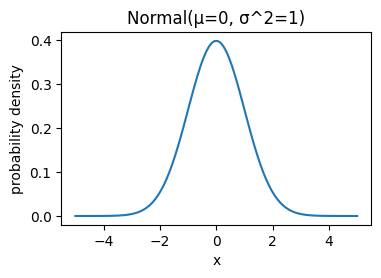

In [2]:
import matplotlib.pyplot  as plt
import numpy as np
from scipy.stats import norm

np.random.seed(0)
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x)

fig, ax = plt.subplots(figsize=[4, 2.5])
ax.plot(x, pdf)
ax.set(title="Normal(μ=0, σ^2=1)", xlabel="x", ylabel="probability density")
fig.show()

## 指数分布

**指数分布（exponential distribution）** は生存時間などを表すのに使われる分布。幾何分布の連続版。

:::{card} 確率密度関数

$$
Ex(\lambda) = f_X(x \mid \lambda)=\lambda e^{-\lambda x}, \quad x>0
$$

- $x$：対象の変数（例：「商品が売れるまでの日数」、「製品が故障するまでの年数」）
- $\lambda$：確率の高さのパラメータ

:::


:::{card} 分布関数

$$
F_X(x) = P(X<x) = 1- e^{-\lambda x}
$$

:::

例えば、「ある商品が$x$日で売れる確率」を $Ex(\lambda) = \lambda e^{-\lambda x}$ とすると、累積分布関数 $P(X < x) = 1- e^{-\lambda x}$ は「商品が$x$日未満で売れる確率」となる

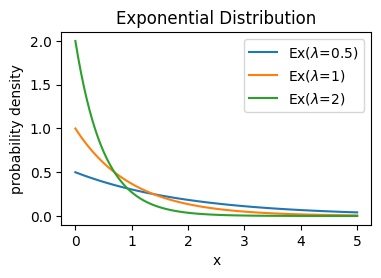

In [18]:
import matplotlib.pyplot  as plt
import numpy as np
from scipy.stats import expon

np.random.seed(0)
x = np.linspace(0, 5, 100)

fig, ax = plt.subplots(figsize=[4, 2.5])


lam = 0.5
ax.plot(x, expon.pdf(x, scale=1/lam), label=r"Ex($\lambda$=" + f"{lam}" + ")")

lam = 1
ax.plot(x, expon.pdf(x, scale=1/lam), label=r"Ex($\lambda$=" + f"{lam}" + ")")

lam = 2
ax.plot(x, expon.pdf(x, scale=1/lam), label=r"Ex($\lambda$=" + f"{lam}" + ")")


ax.set(title="Exponential Distribution", xlabel="x", ylabel="probability density")
ax.legend()
fig.show()

### ハザード関数

$X$を非負の連続型確率変数とし、その密度関数を$f(x)$、分布関数を$F(x)$とする。$X$を生命が死亡したり機械が故障する時間を表す変数とみなすと、$x$時間まで生存していて次の時間$x+\Delta$までに死亡する条件付き確率は

$$
\begin{aligned}
P(x<X \leq x+\Delta \mid X>x) & =\frac{P(x<X \leq x+\Delta, X>x)}{P(X>x)} \\
& =\frac{P(x<X \leq x+\Delta)}{P(X>x)}\\
&=\frac{F(x+\Delta)-F(x)}{1-F(x)}
\end{aligned}
$$

両辺を$\Delta$で割ると

$$
\begin{aligned}
\frac{1}{\Delta} P(x<X \leq x+\Delta \mid X>x)
&=\frac{1}{\Delta} \cdot \frac{F(x+\Delta)-F(x)}{1-F(x)}\\
&=\frac{F(x+\Delta)-F(x)}{\Delta} \cdot \frac{1}{1-F(x)}
\end{aligned}
$$

$\Delta \to 0$の極限を考えると、$\frac{F(x+\Delta)-F(x)}{\Delta}$は微分の定義と同じ形であるから、分布関数の微分すなわち確率密度関数である。

$$
\lim_{\Delta\downarrow 0} \frac{F(x+\Delta)-F(x)}{\Delta} = F'(x) = f(x)
$$

なので

$$
\lim _{\Delta \downarrow 0} \frac{1}{\Delta} P(x<X \leq x+\Delta \mid X>x) = \frac{f(x)}{1-F(x)}
$$

となる。

この「$x$時間まで生存していて次の時間$x+\Delta$までに死亡する条件付き確率」

$$
\lambda(x) = \frac{f(x)}{1-F(x)}
$$

を **ハザード関数 (hazard function)** という。

### 指数分布のハザード関数

ハザード関数に指数分布をあてはめると

$$
\lambda(x) = \frac{f(x)}{1-F(x)}
= \frac{\lambda e^{-\lambda x}}{1 - (1- e^{-\lambda x})}
= \frac{\lambda e^{-\lambda x}}{e^{-\lambda x}} = \lambda
$$

であり、次の瞬間に死亡する確率密度は時間$x$に無関係で常に一定で$\lambda$となっていることがわかる（幾何分布や指数分布のこの性質は **無記憶性** と呼ばれる）。


### ハザード関数による非負の連続型確率分布の生成

非負の連続型確率変数の分布は、ハザード関数によって特徴づけられる。

ハザード関数の両辺を積分すると

$$
\int_0^x \lambda(t) d t
= \int_0^x \frac{ f(t) }{ 1-F(t)} d t
= [- \log (1 - F(t))]^x_0
$$

となる

:::{dropdown} 途中式メモ

$u=1-F(t)$ と置き換えると、 $d u=-F^{\prime}(t) d t=-f(t) d t$ と置き換えられる。したがって

$$
\int_0^x \frac{f(t)}{1-F(t)} d t
=\int_{t=0}^{t=x} - \frac{d u}{u}
=\int_{t=0}^{t=x} - \frac{1}{u} d u
$$

となる。$-\frac{1}{u}$の原始関数は$-\log u$なので

$$
\int_{t=0}^{t=x} - \frac{1}{u} d u
= - \log u
$$

$u=1-F(t)$を代入して戻せば

$$
\int_0^x \frac{f(t)}{1-F(t)} d t=[-\log (1-F(t))]_{t=0}^{t=x}
$$

:::

これは、次のように整理できる

$$
\begin{aligned}
& F(x)=1-\exp \left\{-\int_0^x \lambda(t) d t\right\} \\
& f(x)=\lambda(x) \exp \left\{-\int_0^x \lambda(t) d t\right\}
\end{aligned}
$$

:::{dropdown} 途中式

$S(x):=1-F(x)$とおく（これは **生存関数** と呼ばれる）。するとハザード関数は

$$
\lambda(x)=\frac{f(x)}{1-F(x)}=\frac{f(x)}{S(x)}
$$

となる。ハザード関数の積分は、確率変数が非負なので$F(0)=0 \implies S(0) = 1 \implies \log S(0) = 0$ なので、

$$
\begin{aligned}
\int_0^x \lambda(t) d t
&=-[\log S(t)]_0^x\\
&= -\log S(x) + \log S(0)\\
&= -\log S(x)
\end{aligned}
$$

となる。両辺を-1倍して指数をとれば

$$
S(x) = \exp \left\{ - \int_0^x \lambda(t) d t \right\}
$$

となるので、ハザード関数は

$$
\begin{aligned}
\lambda(x) &= \frac{f(x)}{1 - F(x)} =\frac{f(x)}{S(x)}\\
&\iff \lambda(x) S(x) = f(x)\\
&\iff \boxed{ f(x) = \lambda(x) \exp \left\{ - \int_0^x \lambda(t) d t \right\} }
\end{aligned}
$$

と整理でき、また

$$
\begin{aligned}
F(x) &= 1 - S(x) \\
&= \boxed{ 1-\exp \left\{-\int_0^x \lambda(t) d t\right\} }
\end{aligned}
$$

:::



例えば$\lambda(x) = \lambda$と定数をおくと指数分布が生ずる

## ワイブル分布

時間の経過とともに死亡しやすくなるようなハザード関数を考えたい場合は、

$$
\lambda(x) = a b x^{b-1}, \quad a > 0, b > 0
$$

というハザード関数が考えられる。


これの積分は

$$
\begin{aligned}
\int_0^x \lambda(t) d t
&= \int_0^x a b t^{b-1} d t \\
&= a b\left[\frac{1}{b} t^b \right]_0^x=a x^b
\end{aligned}
$$


であるので、このハザード関数を前述の

$$
f(x)=\lambda(x) \exp \left\{-\int_0^x \lambda(t) d t\right\}
$$

に代入すると、

$$
f(x) = a b x^{b-1} \exp \{ -a x^b \}
$$


となる。この分布

$$
f(x\mid a, b) = a b x^{b-1} \exp \{ -a x^b \}, \quad x > 0
$$

を **ワイブル分布（Weibull distribution）** といい、生存解析で基本となる分布である。


## ガンマ分布

**ガンマ分布**（gamma distribution）は非負の実数直線上の代表的な確率分布。その確率密度関数は

$$
f(x|\alpha, \beta)
= \frac{1}{\Gamma(\alpha)}
\frac{1}{\beta}
\left( \frac{x}{\beta} \right) ^{\alpha-1}
e^{-x/\beta}
, \ x > 0
$$

である。$\alpha$はshape parameter、$\beta$はscale parameterと呼ばれ、$\alpha > 0, \beta > 0$である。

尺度変換$Y = X /\beta$を行うと、$Y$の分布は$\beta f(\beta y|\alpha, \beta)$となり

$$
f(y|\alpha) = \frac{1}{\Gamma(\alpha)}
y^{\alpha-1}
e^{-y}
,  \ y > 0
$$

となる。

尺度変換$\lambda = 1 /\beta$を行った

$$
f(x|\alpha, \lambda) = \frac{\lambda^\alpha}{\Gamma(\alpha)}
t^{\alpha-1}
e^{-\lambda x}
,\quad x > 0
$$

という定義も使われる（$\lambda$はrateと呼ばれる）

$a=1$のとき、ガンマ分布は指数分布と一致する。指数分布はmemoryless

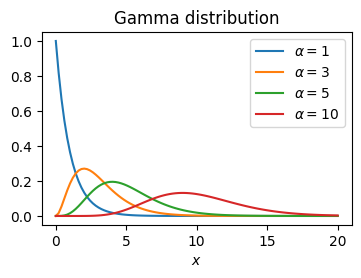

In [3]:
import numpy as np
import matplotlib.pyplot  as plt
from scipy.stats import gamma

x = np.linspace(0, 20, 100)

fig, ax = plt.subplots(figsize=[4, 2.5])
for alpha in [1, 3, 5, 10]:
    y = gamma.pdf(x, alpha)
    ax.plot(x, y, label=fr"$\alpha={alpha}$")
ax.legend()
ax.set(title=r"Gamma distribution", xlabel=r"$x$")
fig.show()

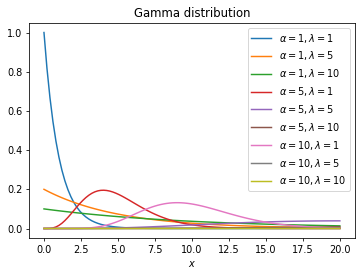

In [9]:
import numpy as np
import matplotlib.pyplot  as plt
from scipy.stats import gamma

x = np.linspace(0, 20, 100)

fig, ax = plt.subplots(figsize=[6, 4], dpi=70)
for alpha in [1, 5, 10]:
    for lambda_ in [1, 5, 10]:
        y = gamma.pdf(x, alpha, scale=lambda_)
        ax.plot(x, y, label=fr"$\alpha={alpha}, \lambda={lambda_}$")
ax.legend()
ax.set(title=r"Gamma distribution", xlabel=r"$x$")
fig.show()



ここで$\Gamma(\alpha)$は**ガンマ関数**（gamma function）

$$
\Gamma(\alpha)
= \int^{\infty}_0 y^{\alpha-1} e^{-y} dy
$$


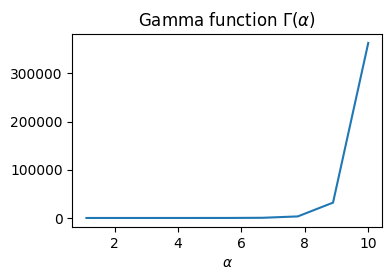

In [10]:
from scipy.special import gamma

x = np.linspace(0, 10, 10)
y = gamma(x)

fig, ax = plt.subplots(figsize=[4, 2.5])
ax.plot(x, y)
ax.set(title=r"Gamma function $\Gamma(\alpha)$", xlabel=r"$\alpha$")
fig.show()

## $\chi^2$分布

データの二乗和が従う確率分布のこと。標準正規分布に従う確率変数$X_i$の二乗和$Z_i = \sum_i^n X_i^2$は**自由度$n$のカイ2乗分布**（chi-square distribution with n degrees of freedom）に従う（$n$は自然数）

$$
Z \sim \chi^2_{(n)}
$$

カイ2乗分布の密度関数は

$$
f(x) = \frac{1}{\Gamma(n/2)} \left( \frac{1}{2} \right)^{n/2} x^{n/2-1} \exp \{ - \frac{x}{2} \}, x > 0
$$


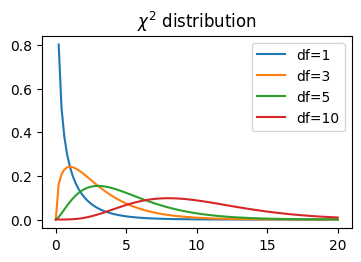

In [11]:
from scipy.stats import chi2

x = np.linspace(0, 20, 100)
dfs = [1, 3, 5, 10]

fig, ax = plt.subplots(figsize=[4, 2.5])
for df in dfs:
    y = chi2.pdf(x, df=df)
    ax.plot(x, y, label=f"df={df}")
ax.legend()
ax.set(title=r"$\chi^2$ distribution")
fig.show()